
![Foto](bsball 2.jpeg)

If you need to know about baseball, check the next link: https://en.wikipedia.org/wiki/Baseball

            
                        

# Nanodree Program: L05 Project - Investigate a Baseball Dataset



## 0. INPUTS

The Databank used in this project is: http://seanlahman.com/files/database/baseballdatabank-2017.1.zip
    
**This Baseball Databank is a compilation of historical baseball data in a convenient, tidy format, distributed under Open Data terms.**

This work is licensed under a Creative Commons Attribution-ShareAlike 3.0 Unported License.  
For details see: http://creativecommons.org/licenses/by-sa/3.0/


### Data Tables

The design follows these general principles.  Each player is assigned a unique number (playerid).  All of the information relating to that player is tagged with his playerid.  The playerids are linked to names and birthdates in the MASTER table.

The database is comprised of the following main tables:

- MASTER - Player names, DOB, and biographical info
- Batting - batting statistics
- Pitching - pitching statistics
- Fielding - fielding statistics

It is supplemented by these tables:
- AllStarFull - All-Star appearances
- HallofFame - Hall of Fame voting data
- Managers - managerial statistics
- Teams - yearly stats and standings 
- BattingPost - post-season batting statistics
- PitchingPost - post-season pitching statistics
- TeamFranchises - franchise information
- FieldingOF - outfield position data  
- FieldingPost- post-season fieldinf data
- ManagersHalf - split season data for managers
- TeamsHalf - split season data for teams
- Salaries - player salary data
- SeriesPost - post-season series information
- AwardsManagers - awards won by managers 
- AwardsPlayers - awards won by players
- AwardsShareManagers - award voting for manager awards
- AwardsSharePlayers - award voting for player awards
- Appearances - details on the positions a player appeared at
- Schools - list of colleges that players attended
- CollegePlaying - list of players and the colleges they attended

Three extra .CSV files, are not refered, but are provided in the databank:
- FieldingOFsplit
- HomeGames
- Parks


## 1. QUESTIONS

Through the data analysis of the previous inputs, the project tries to answer the next questions:

+ *What is the general info (number of rows, number of columns, columns names, index and data types for the 'Salaries.csv' file?*
+ *What are the Salaries Dataframe stats for year and salary?*
+ *Who are the 10 best paid players in all the stored data?*
+ *What are the two best paid players' names and names given?*
+ *Who are 5 worst paid players in all the stored data?*
+ *What are the stats between different leagues?*
+ *What is the evolution of the max. and mean salary for the available data?*
+ *What are the differences in the mean salary for the different leagues?*
+ *What are the differences in the max. salary for the different leagues?*
+ *What are the names of the teams with the best paid players for the different leagues?*
+ *What are the years where there is a change in the max. salary trend for the different leagues?*
+ *What is the salary stats before year 2001 for the different leagues?*
+ *What is the salary stats between year 2001 and 2014 for the different leagues?*
+ *What is the salary stats after year 2014 for the different leagues?*
+ *What is the salaries sum evolution per league?*
    

## 2. WRANGLE PHASE

In this phase the data is loaded and clean to allow a right analysis.


### 2.1 Load Data

As the data is stored in *.csv files, this info is read and analysed through Dataframes. Not all the files are used in this project.

In [22]:
# PROJECT. INVESTIGATE A DATASET
#----------------------------------
# Import Libraries, Modules, ...
#----------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats.stats import pearsonr

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [23]:
#-----------------------------------------------
# Read data from *.csv and create a Dataframe
#-----------------------------------------------
Salaries_df = pd.read_csv('baseballdatabank-2017.1\core\Salaries.csv')
Master_df = pd.read_csv('baseballdatabank-2017.1\core\Master.csv')
Teams_df = pd.read_csv('baseballdatabank-2017.1\core\Teams.csv')
# AllStarFull_df = pd.read_csv('baseballdatabank-2017.1\core\AllStarFull.csv')
# Appearances_df = pd.read_csv('baseballdatabank-2017.1\core\Appearances.csv')
# AwardsManagers_df = pd.read_csv('baseballdatabank-2017.1\core\AwardsManagers.csv')
# AwardsPlayers_df = pd.read_csv('baseballdatabank-2017.1\core\AwardsPlayers.csv')
# AwardsShareManagers_df = pd.read_csv('baseballdatabank-2017.1\core\AwardsShareManagers.csv')
# AwardsSharePlayers_df = pd.read_csv('baseballdatabank-2017.1\core\AwardsSharePlayers.csv')
# Batting_df = pd.read_csv('baseballdatabank-2017.1\core\Batting.csv')
# BattingPost_df = pd.read_csv('baseballdatabank-2017.1\core\BattingPost.csv')
# CollegePlaying_df = pd.read_csv('baseballdatabank-2017.1\core\CollegePlaying.csv')
# Fielding_df = pd.read_csv('baseballdatabank-2017.1\core\Fielding.csv')
# FieldingOF_df = pd.read_csv('baseballdatabank-2017.1\core\FieldingOF.csv')
# FieldingPost_df = pd.read_csv('baseballdatabank-2017.1\core\FieldingPost.csv')
# HallOfFame_df = pd.read_csv('baseballdatabank-2017.1\core\HallOfFame.csv')
# Managers_df = pd.read_csv('baseballdatabank-2017.1\core\Managers.csv')
# ManagersHalf_df = pd.read_csv('baseballdatabank-2017.1\core\ManagersHalf.csv')
# Pitching_df = pd.read_csv('baseballdatabank-2017.1\core\Pitching.csv')
# PitchingPost_df = pd.read_csv('baseballdatabank-2017.1\core\PitchingPost.csv')
# Schools_df = pd.read_csv('baseballdatabank-2017.1\core\Schools.csv')
# SeriesPost_df = pd.read_csv('baseballdatabank-2017.1\core\SeriesPost.csv')
# TeamsFranchises_df = pd.read_csv('baseballdatabank-2017.1\core\TeamsFranchises.csv')
# TeamsHalf_df = pd.read_csv('baseballdatabank-2017.1\core\TeamsHalf.csv')

### 2.2 Data Cleaning

It is neccesary a check of the data. Looking for missing values, right number of rows and columns, check variables names, ...   
Also some stats analysis are performed.

There are some problems with variables name and despcription. As example for the variable 'playerid':

        playerid       A unique code asssigned to each player. 
        playerid       Manager ID code
        playerid       Player ID Number
        playerid       Player ID code
        playerid       Player ID code
        
    1. There are different names refering to the same variable (you can see in the last two rows).    
      This can be solved changing all names to the same, lowercase or uppercase.   
      
    2. There is the problem of the same name refering to different variables. This problem is in some CSV files.

Then, it is needed a deep review of the variables names and description. The first problem is solved changing variables names to lowercase. The second problem needs a deep review of all variables (337) in all the files (27) and this is not the scope of this project, then it is taken a special care to manage variables used in the few files used in this project.

In [24]:
Salaries_df.columns = Salaries_df.columns.str.lower()
Master_df.columns = Master_df.columns.str.lower()
Teams_df.columns = Teams_df.columns.str.lower()

+ *What is the general info (number of rows, number of columns, columns names, index and data types for the 'Salaries.csv' file?*

In [25]:
Salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearid      26428 non-null int64
teamid      26428 non-null object
lgid        26428 non-null object
playerid    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


+ *What are the Salaries Dataframe stats for year and salary?*

In [26]:
Salaries_df.describe()

,yearid,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


+ *Who are the 10 best paid players in all the stored data?*

In [27]:
Salaries_df.sort_values('salary', ascending=False).head(10)

,yearid,teamid,lgid,playerid,salary
25965,2016,LAD,NL,kershcl01,33000000
20286,2009,NYA,AL,rodrial01,33000000
21109,2010,NYA,AL,rodrial01,33000000
25131,2015,LAN,NL,kershcl01,32571000
21945,2011,NYA,AL,rodrial01,32000000
25588,2016,ARI,NL,greinza01,31799030
25673,2016,BOS,AL,priceda01,30000000
22793,2012,NYA,AL,rodrial01,30000000
23616,2013,NYA,AL,rodrial01,29000000
25858,2016,DET,AL,verlaju01,28000000


+ *What are the two best paid players' names and names given?*

In [28]:
Best_2 = Salaries_df.sort_values('salary', ascending=False).head(2)
Best_2=Best_2.set_index('playerid')
Master_names = Master_df.set_index('playerid')
Best_2.join(Master_names[['namefirst', 'namelast', 'namegiven']])

,yearid,teamid,lgid,salary,namefirst,namelast,namegiven
playerid,,,,,,,
kershcl01,2016,LAD,NL,33000000,Clayton,Kershaw,Clayton Edward
rodrial01,2009,NYA,AL,33000000,Alex,Rodriguez,Alexander Enmanuel


+ *Who are 5 worst paid players in all the stored data?*

In [29]:
Salaries_df.sort_values('salary', ascending=False).tail()

,yearid,teamid,lgid,playerid,salary
9679,1997,FLO,NL,penaal01,50000
6659,1994,CHA,AL,carych01,50000
6194,1993,NYA,AL,silveda01,10900
12007,1999,PIT,NL,martija02,0
6179,1993,NYA,AL,jamesdi01,0


## 3. EXPLORE

The next chapter analyses the 'clean' data to answer the proposed questions in chapter 1.

+ *What are the stats between different leagues?*

In [30]:
print Salaries_df.groupby('lgid')['salary'].describe()

lgid       
AL    count    1.295900e+04
      mean     2.128432e+06
      std      3.562568e+06
      min      0.000000e+00
      25%      2.750000e+05
      50%      5.501310e+05
      75%      2.400000e+06
      max      3.300000e+07
NL    count    1.346900e+04
      mean     2.044457e+06
      std      3.348566e+06
      min      0.000000e+00
      25%      3.000000e+05
      50%      5.500000e+05
      75%      2.300000e+06
      max      3.300000e+07
Name: salary, dtype: float64


+ *What is the evolution of the max. and mean salary for the available data?*

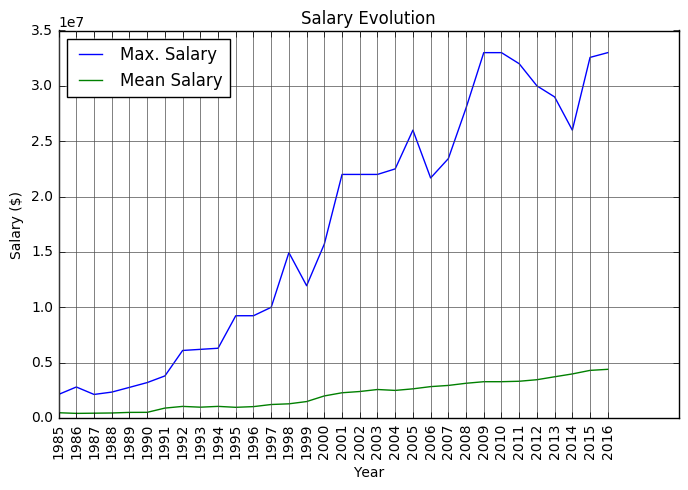

In [31]:
plt.figure(figsize=[8,5])
plt.plot(Salaries_df.groupby('yearid').max()['salary'], label='Max. Salary')
plt.plot(Salaries_df.groupby('yearid').mean()['salary'], label='Mean Salary')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.title("Salary Evolution")
plt.xticks(Salaries_df.groupby('yearid').mean().index, rotation='vertical')
plt.grid(b=True, which='both', color='0.3',linestyle='-')
plt.show()

+ *What are the differences in the mean salary for the different leagues?*

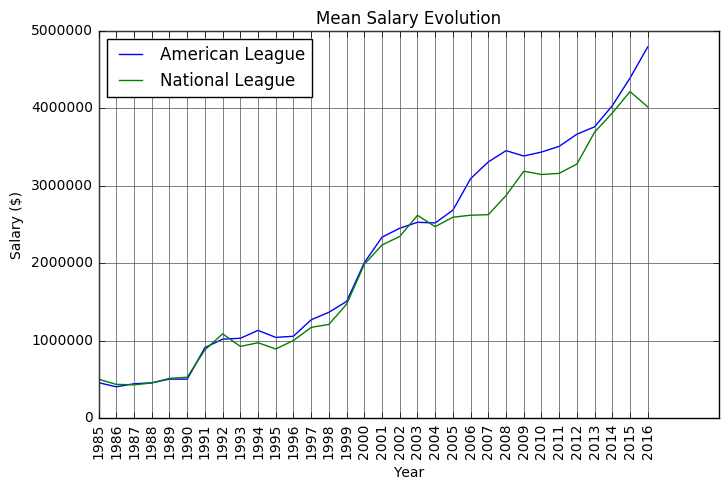

In [32]:
plt.figure(figsize=[8,5])
plt.plot(Salaries_df[Salaries_df.lgid == "AL"].groupby('yearid').mean()['salary'], label='American League')
plt.plot(Salaries_df[Salaries_df.lgid == "NL"].groupby('yearid').mean()['salary'], label='National League')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.title("Mean Salary Evolution")
plt.xticks(Salaries_df.groupby('yearid').mean().index, rotation='vertical')
plt.grid(b=True, which='both', color='0.3',linestyle='-')
plt.show()

+ *What are the differences in the max. salary for the different leagues?*

In [33]:
lgA_max_s = Salaries_df.ix[Salaries_df[Salaries_df.lgid == "AL"].groupby('yearid').idxmax().salary]
lgN_max_s = Salaries_df.ix[Salaries_df[Salaries_df.lgid == "NL"].groupby('yearid').idxmax().salary]
lgA_max_s.index = lgA_max_s['yearid']
lgN_max_s.index = lgN_max_s['yearid']
lgA_max_s.columns = ['yearid', 'teamid_AL', 'lgid_AL', 'playerid_AL', 'salary_AL']
lgN_max_s.columns = ['yearid', 'teamid_NL', 'lgid_NL', 'playerid_NL', 'salary_NL']
lg_max_s = pd.concat([lgA_max_s, lgN_max_s], axis=1)

display (lg_max_s[['playerid_AL', 'teamid_AL','salary_AL','playerid_NL','teamid_NL','salary_NL']])

,playerid_AL,teamid_AL,salary_AL,playerid_NL,teamid_NL,salary_NL
yearid,,,,,,
1985,winfida01,NYA,1795704,schmimi01,PHI,2130300
1986,riceji01,BOS,1984423,fostege01,NYN,2800000
1987,riceji01,BOS,2110000,schmimi01,PHI,2127333
1988,brettge01,KCA,2305000,smithoz01,SLN,2340000
1989,violafr01,MIN,2766666,hershor01,LAN,2766667
1990,yountro01,ML4,3200000,murraed02,LAN,2513703
1991,cartejo01,TOR,3791667,strawda01,LAN,3800000
1992,tartada01,NYA,5300000,bonilbo01,NYN,6100000
1993,cartejo01,TOR,5550000,bonilbo01,NYN,6200000


+ *What are the names of the teams with the best paid players for the different leagues?*

In [34]:
Team_1 = lgA_max_s['teamid_AL'].drop_duplicates(keep='last')
Team_2 = lgN_max_s['teamid_NL'].drop_duplicates(keep='last')
# We are interested only in names where yearid > 1985, as we have salaries in the range 1985-2016.
display(Teams_df.loc[Teams_df['teamid'].isin(Team_1)].drop_duplicates(subset='name', keep='last'))
display(Teams_df.loc[Teams_df['teamid'].isin(Team_2)].drop_duplicates(subset='name', keep='last'))


,yearid,lgid,teamid,franchid,divid,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,teamidbr,teamidlahman45,teamidretro
479,1907,AL,BOS,BOS,NaN,7,155,78.0,59,90,...,103.0,0.959,Boston Americans,Huntington Avenue Grounds,436777.0,99,101,BOS,BOS,BOS
568,1912,AL,NYA,NYY,NaN,8,153,76.0,50,102,...,77.0,0.940,New York Highlanders,Hilltop Park,242194.0,106,108,NYY,NYA,NYA
2252,1997,AL,ML4,MIL,C,3,161,80.0,78,83,...,171.0,0.980,Milwaukee Brewers,County Stadium,1444027.0,101,102,MIL,MIL,MIL
2807,2016,AL,BAL,BAL,E,2,162,81.0,89,73,...,165.0,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2172344.0,101,101,BAL,BAL,BAL
2808,2016,AL,BOS,BOS,E,1,162,81.0,93,69,...,139.0,0.987,Boston Red Sox,Fenway Park II,2955434.0,108,106,BOS,BOS,BOS
2809,2016,AL,CHA,CHW,C,4,162,81.0,78,84,...,148.0,0.984,Chicago White Sox,U.S. Cellular Field,1746293.0,96,97,CHW,CHA,CHA
2814,2016,AL,DET,DET,C,2,161,81.0,86,75,...,148.0,0.987,Detroit Tigers,Comerica Park,2493859.0,101,101,DET,DET,DET
2816,2016,AL,KCA,KCR,C,3,162,81.0,81,81,...,134.0,0.984,Kansas City Royals,Kauffman Stadium,2557712.0,105,106,KCR,KCA,KCA
2821,2016,AL,MIN,MIN,C,5,162,81.0,59,103,...,172.0,0.979,Minnesota Twins,Target Field,1963912.0,96,98,MIN,MIN,MIN
2822,2016,AL,NYA,NYY,E,4,162,81.0,84,78,...,116.0,0.985,New York Yankees,Yankee Stadium III,3063405.0,105,105,NYY,NYA,NYA


,yearid,lgid,teamid,franchid,divid,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,teamidbr,teamidlahman45,teamidretro
233,1889,NL,PHI,PHI,NaN,4,130,NaN,63,64,...,NaN,0.915,Philadelphia Quakers,Philadelphia Baseball Grounds,NaN,109,108,PHI,PHI,PHI
361,1898,NL,SLN,STL,NaN,12,154,NaN,39,111,...,NaN,0.939,St. Louis Browns,Robison Field,151700.0,102,105,STL,SLN,SLN
373,1899,NL,SLN,STL,NaN,5,155,NaN,84,67,...,NaN,0.939,St. Louis Perfectos,Robison Field,373909.0,102,103,STL,SLN,SLN
1098,1944,NL,PHI,PHI,NaN,8,154,79.0,61,92,...,138.0,0.972,Philadelphia Blue Jays,Shibe Park,369586.0,96,99,PHI,PHI,PHI
1424,1964,NL,HOU,HOU,NaN,9,162,81.0,66,96,...,124.0,0.976,Houston Colt .45's,Colt Stadium,725773.0,95,97,HOU,HOU,HOU
2665,2011,NL,FLO,FLA,E,5,162,78.0,72,90,...,126.0,0.985,Florida Marlins,Sun Life Stadium,1477462.0,99,100,FLA,FLO,FLO
2813,2016,NL,COL,COL,W,3,162,81.0,75,87,...,148.0,0.982,Colorado Rockies,Coors Field,2602524.0,117,117,COL,COL,COL
2815,2016,AL,HOU,HOU,W,3,162,81.0,84,78,...,135.0,0.987,Houston Astros,Minute Maid Park,2306623.0,90,89,HOU,HOU,HOU
2818,2016,NL,LAN,LAD,W,1,162,81.0,91,71,...,101.0,0.986,Los Angeles Dodgers,Dodger Stadium,3703312.0,93,92,LAD,LAN,LAN
2823,2016,NL,NYN,NYM,E,2,162,81.0,87,75,...,138.0,0.985,New York Mets,Citi Field,2789602.0,102,102,NYM,NYN,NYN


+ *What are the years where there is a change in the max. salary trend for the different leagues?*

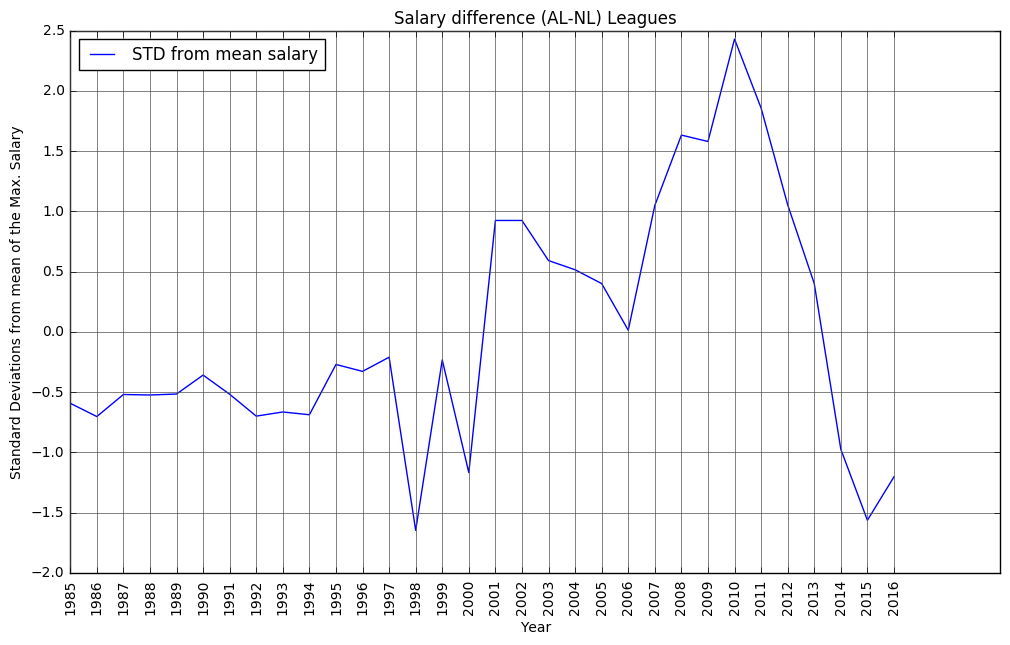

In [35]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return (df-df.mean())/df.std(ddof = 0)

s_diff_lg_max_s = standardize(lgA_max_s.salary_AL-lgN_max_s.salary_NL)
s_AL_lg_max_s = standardize(lgA_max_s.salary_AL)
s_NL_lg_max_s = standardize(lgN_max_s.salary_NL)
plt.figure(figsize=[12,7])
#plt.plot(s_AL_lg_max_s)
#plt.plot(s_NL_lg_max_s)
plt.plot(s_diff_lg_max_s, label= 'STD from mean salary')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Standard Deviations from mean of the Max. Salary')
plt.title("Salary difference (AL-NL) Leagues")
plt.xticks(lgA_max_s.index, rotation='vertical')
plt.grid(b=True, which='both', color='0.3',linestyle='-')
plt.show()

There is a change in the tendency between years 2000 and 2001 and other between years 2013 and 2014.
Because of that it is decided to analyse next periods: 1985-2001, 2001-2014 and 2014-2016.

+ *What is the salary stats before year 2001 for the different leagues?*

In [36]:
print Salaries_df[Salaries_df.yearid<2001].groupby('lgid')['salary'].describe()

lgid       
AL    count    6.639000e+03
      mean     9.744179e+05
      std      1.466450e+06
      min      0.000000e+00
      25%      1.535000e+05
      50%      3.500000e+05
      75%      1.025000e+06
      max      1.286867e+07
NL    count    6.460000e+03
      mean     9.597705e+05
      std      1.468284e+06
      min      0.000000e+00
      25%      1.550000e+05
      50%      3.200000e+05
      75%      1.000000e+06
      max      1.571429e+07
Name: salary, dtype: float64


+ *What is the salary stats between year 2001 and 2014 for the different leagues?*

In [37]:
print Salaries_df[(Salaries_df.yearid >= 2001) & (Salaries_df.yearid <= 2014)].groupby('lgid')['salary'].describe()

lgid       
AL    count    5.484000e+03
      mean     3.150312e+06
      std      4.301768e+06
      min      2.000000e+05
      25%      4.200000e+05
      50%      1.088750e+06
      75%      4.050000e+06
      max      3.300000e+07
NL    count    6.175000e+03
      mean     2.900286e+06
      std      3.947246e+06
      min      1.655740e+05
      25%      4.170000e+05
      50%      9.500000e+05
      75%      3.900000e+06
      max      2.600000e+07
Name: salary, dtype: float64


+ *What is the salary stats after year 2014 for the different leagues?*

In [38]:
print Salaries_df[(Salaries_df.yearid >= 2014)].groupby('lgid')['salary'].describe()

lgid       
AL    count    1.215000e+03
      mean     4.415193e+06
      std      5.738322e+06
      min      5.000000e+05
      25%      5.200000e+05
      50%      1.700000e+06
      75%      6.000000e+06
      max      3.000000e+07
NL    count    1.257000e+03
      mean     4.051025e+06
      std      5.331924e+06
      min      5.000000e+05
      25%      5.177000e+05
      50%      1.500000e+06
      75%      5.350000e+06
      max      3.300000e+07
Name: salary, dtype: float64


+ *What is the salaries sum evolution per league?*

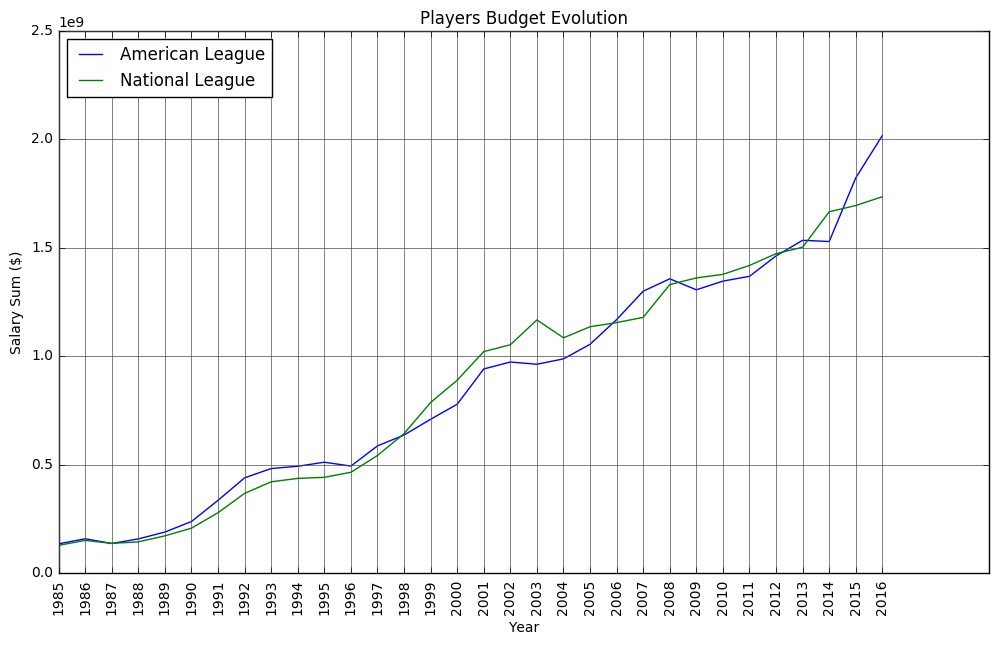

In [39]:
plt.figure(figsize=[12,7])
plt.plot(Salaries_df[Salaries_df.lgid == "AL"].groupby('yearid').sum().salary, label='American League')
plt.plot(Salaries_df[Salaries_df.lgid == "NL"].groupby('yearid').sum().salary, label='National League')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Salary Sum ($)')
plt.title("Players Budget Evolution")
plt.xticks(Salaries_df.groupby('yearid').mean().index, rotation='vertical')
plt.grid(b=True, which='both', color='0.3',linestyle='-')
plt.show()

## 4. CONCLUSIONS

In general we can tell that highest salary is increasing with time. There are some periods with valleys, but the tendency is to grow if we consider both leagues.   
The baseball player with highest salaries are:
            
- Alex 	Rodriguez 'Alexander Enmanuel' that played in the American league for the team 'New York Yankees' and had salary of 3.3e7$ in the years 2009 and 2010.  
   
- Clayton Kershaw 'Clayton Edward' played in the National league for the team 'Los Angeles Dodgers' and had salary of 3.3e7$ in the year 2016.
            
According to previous statistics and plots the comparative between American and National League for the highest salary can be divided in three periods:

+ 1985-2001: The American and National league have similar salaries.
+ 2001-2014: The American league have the highest salary for baseball players from this period.
+ 2014-2016: It looks that there is a change in the trend for the latest years and the National league equals the highest salary reached by the American league in years 2009 and 2010.

The total budget for the American and National league have a similar evolution, in any case, it is remarkable that the National league had higher budget in a period where American league had higher max. salary.

##  5. COMMUNICATE

The next plots summaries the previous conclusions.

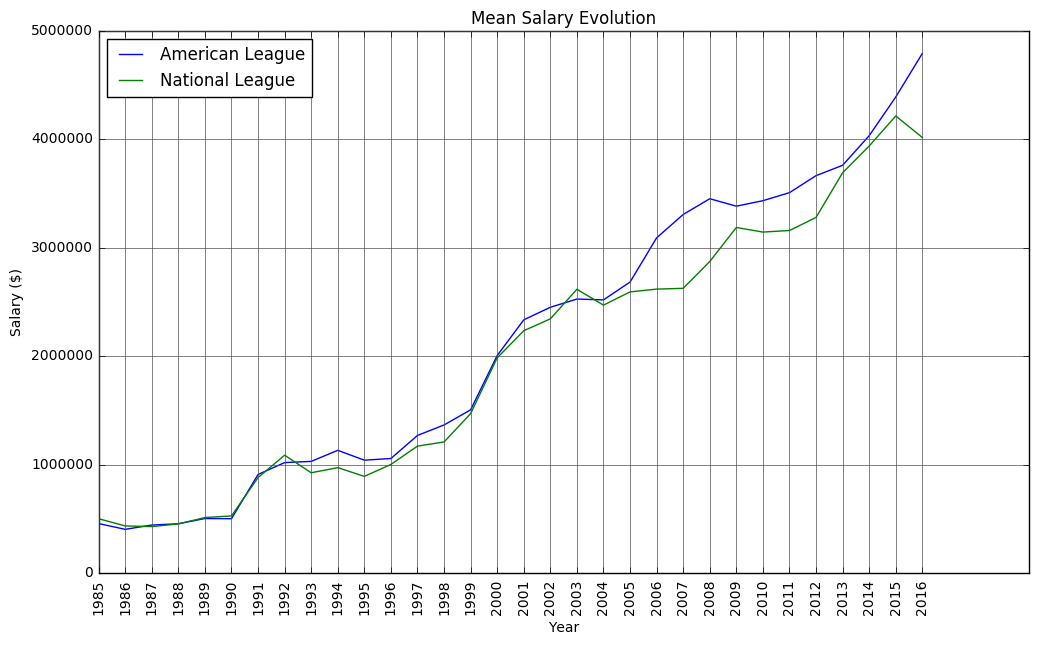

In [40]:
plt.figure(figsize=[12,7])
plt.plot(Salaries_df[Salaries_df.lgid == "AL"].groupby('yearid').mean()['salary'], label='American League')
plt.plot(Salaries_df[Salaries_df.lgid == "NL"].groupby('yearid').mean()['salary'], label='National League')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.title("Mean Salary Evolution")
plt.xticks(Salaries_df.groupby('yearid').mean().index, rotation='vertical')
plt.grid(b=True, which='both', color='0.3',linestyle='-')
plt.show()

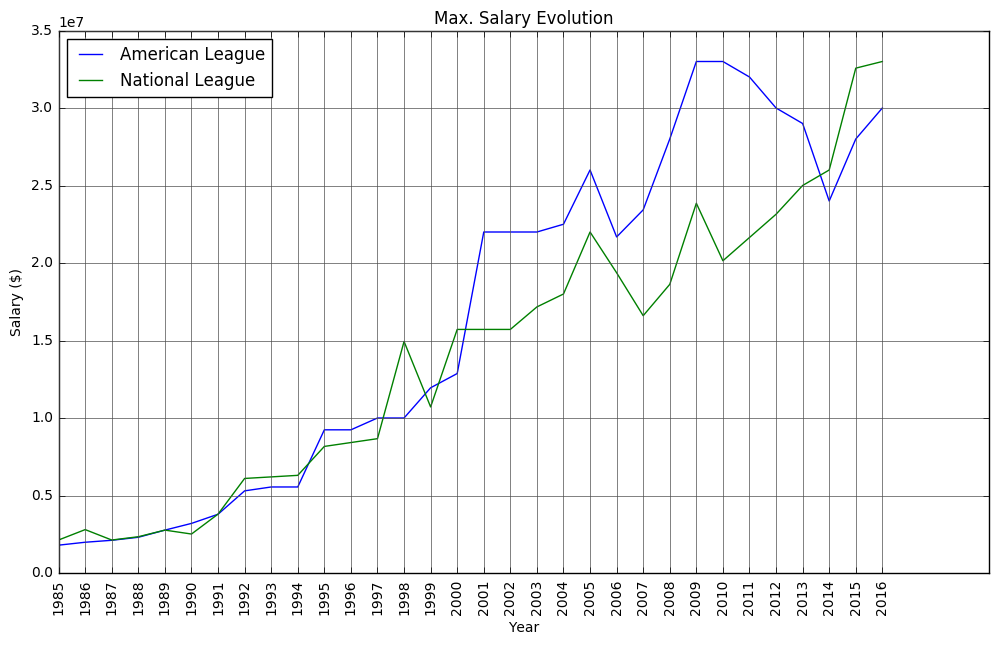

In [41]:
plt.figure(figsize=[12,7])
plt.plot(lgA_max_s.salary_AL, label='American League')
plt.plot(lgN_max_s.salary_NL, label='National League')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.title("Max. Salary Evolution")
plt.xticks(lgA_max_s.index, rotation='vertical')
plt.grid(b=True, which='both', color='0.3',linestyle='-')
plt.show()

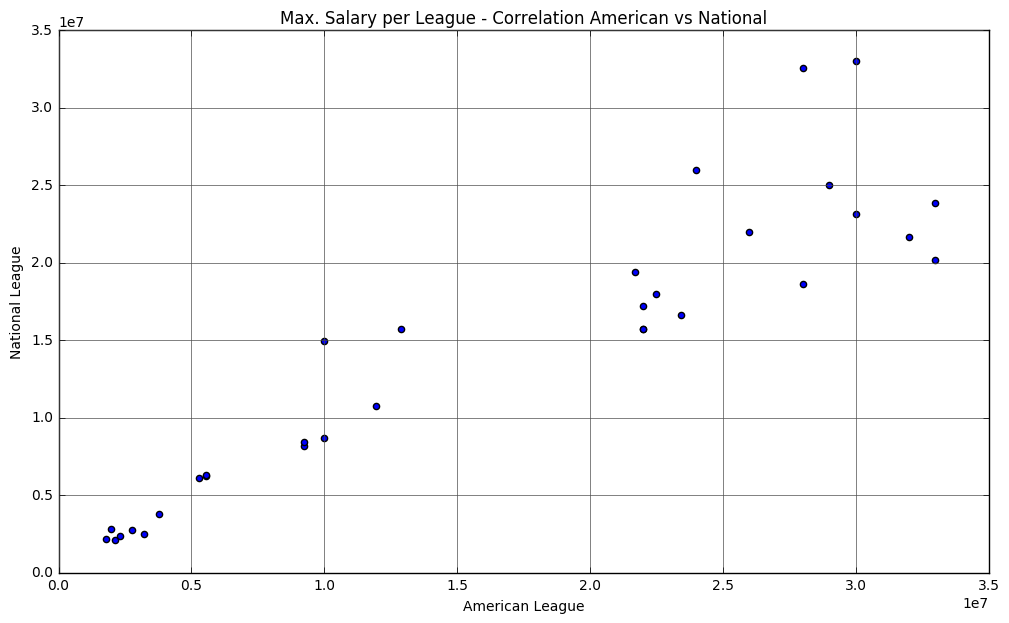

Pearson coef.:


(0.92374204417019401, 4.8796133987136354e-14)

In [42]:
plt.figure(figsize=[12,7])
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#scatter(x2, y2, color='b', s=s/2, alpha=.4)
plt.scatter(lgA_max_s.salary_AL, lgN_max_s.salary_NL)
#plt.legend(loc='upper left')
plt.xlabel('American League')
plt.ylabel('National League')
plt.title("Max. Salary per League - Correlation American vs National")
plt.grid(b=True, which='both', color='0.3',linestyle='-')
plt.show()

print "Pearson coef.:"
pearsonr(lgA_max_s.salary_AL, lgN_max_s.salary_NL)